In [28]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import os

original_img = cv2.imread('/home/joao/M.IA/VC_project/VC_2425_Project_public/images/G000_IMG062.jpg')

Text(0.5, 1.0, 'Original Image')

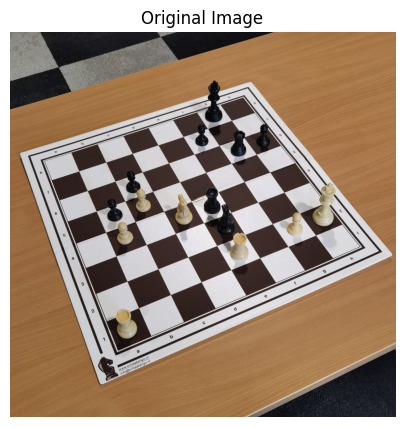

In [29]:
rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.imshow(rgb_img)
plt.axis('off')
plt.title('Original Image')

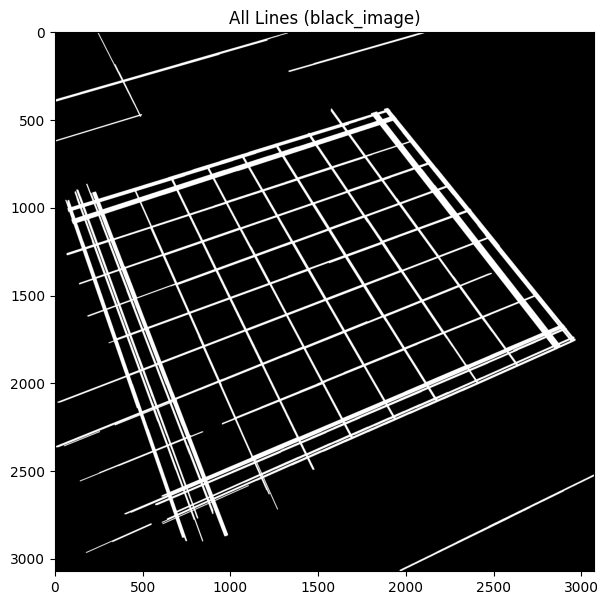

In [30]:
# OTSU threshold
ret, otsu_binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Canny edge detection
canny_image = cv2.Canny(otsu_binary, 20, 255)

# Dilation
kernel = np.ones((7, 7), np.uint8)
dilation_image = cv2.dilate(canny_image, kernel, iterations=1)

# Hough Lines
lines = cv2.HoughLinesP(dilation_image, 1, np.pi / 180, threshold=500, minLineLength=150, maxLineGap=100)


# Create an image that contains only black pixels
black_image = np.zeros_like(dilation_image)

# Draw only lines that are output of HoughLinesP function to the "black_image"
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # draw only lines to the "black_image"
        cv2.line(black_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Dilation
kernel = np.ones((3, 3), np.uint8)
black_image = cv2.dilate(black_image, kernel, iterations=1)

plt.figure(figsize=(9,7))
plt.title("All Lines (black_image)")
plt.imshow(black_image,cmap="gray")